# Como usar com o Pandas

Os catálogos de dados abertos podem ser consultados facilmente com a ferramenta
Pandas, com ou sem Jupyter Notebook.

Esse tutorial inspirado na
[demonstração](https://github.com/okfn/okfn.github.com/blob/master/resources/using-data-packages-with-pandas.ipynb)
do Open Knowledge Labs.

## Pacotes necessários

### Frictionless Data

Além do Pandas, será necessário instalar alguns pacotes para trabalhar com [Frictionless Data](https://frictionlessdata.io/). Para isso,
execute:

`pip install datapackage tableschema-pandas`

Para maiores informações sobre como usar esses pacotes, veja o exemplo contido
no repositório do
[tableschema-pandas](https://github.com/frictionlessdata/tableschema-pandas-py/).

### Plotly e Plotly Express

Para visualizar os dados, utilizaremos Plotly e Plotly Express.
Entretanto, sinta-se à vontade para usar a biblioteca de visualização de sua
preferência.

Para instalar:

`pip install plotly plotly_express`

### Versões

Para este tutorial, estamos usando a versão `1.10.0` do `datapackage`, a
versão `1.1.0` do `tableschema-pandas`. Quanto às bibliotecas de
visualização, usamos Plotly versão `4.1.0` e Plotly Express versão `0.4.1`.

Para saber a sua versão, após ter instalado, use os comandos

```
pip freeze | grep datapackage
pip freeze | grep tableschema
pip freeze | grep plotly
```

Se desejar instalar essas versões exatas, é possível executar o comando

`pip install -r requirements.txt`

pois esse arquivo já contém as versões afixadas.

In [26]:
import pandas as pd

# Para trabalhar com Frictionless Data – frictionlessdata.io
from tableschema import Storage
from datapackage import Package

# Para visualização
import plotly_express as px
import plotly as py, plotly.graph_objects as go

## Lendo o pacote de dados

É possível ler o pacote de dados diretamente a partir da URL:

In [4]:
# Gravar no Pandas

url = 'https://github.com/dadosgovbr/catalogos-dados-brasil/raw/master/datapackage.json'

storage = Storage.connect('pandas')
package = Package(url)
package.save(storage=storage)

True

Um pacote de dados pode conter uma quantidade de *recursos*. Pense em um
recurso como uma tabela em um banco de dados. Cada um é um arquivo CSV.

No contexto do armazenamento dos dados, esses recursos também são chamados de *buckets* (numa tradução livre, "baldes").

In [5]:
storage.buckets

['catalogos', 'solucao']

Que são também Dataframes do Pandas:

In [6]:
type(storage['catalogos'])

pandas.core.frame.DataFrame

Por isso, funcionam todas as operações que podem ser feitas com um DataFrames
do Pandas:

In [7]:
storage['solucao']

,Solução,Tipo de Licença,URL,Conceito
0,CKAN,aberta,http://ckan.org/,https://www.wikidata.org/wiki/Q977484
1,ArcGIS,proprietária,https://www.arcgis.com,https://www.wikidata.org/wiki/Q513297
2,Interna,None,None,https://www.wikidata.org/wiki/Q29256


Como, por exemplo, mostrar o início da tabela.

In [8]:
storage['catalogos'].head()

,Título,URL,Município,UF,Esfera,Poder,Solução
0,Alagoas em dados e informações,http://dados.al.gov.br/,None,AL,Estadual,Executivo,CKAN
1,Fortaleza Dados Abertos,http://dados.fortaleza.ce.gov.br/,Fortaleza,CE,Municipal,Executivo,CKAN
2,Dados abertos – TCM-CE,http://api.tcm.ce.gov.br/,None,CE,Estadual,Legislativo,Interna
3,Dados abertos Distrito Federal,http://dados.df.gov.br/,None,DF,Estadual,Executivo,CKAN
4,Dados abertos – Governo do ES,https://transparencia.es.gov.br/DadosAbertos/B...,None,ES,Estadual,Executivo,Interna


Ou ver quantos portais existem por tipo de solução, ou por UF, ou por poder,
etc.

### Por tipo de solução

In [19]:
tipo_solucao = storage['catalogos'].groupby('Solução').count()['URL'].rename('quantidade')
tipo_solucao

Solução
ArcGIS      1
CKAN       15
Interna    23
Name: quantidade, dtype: int64

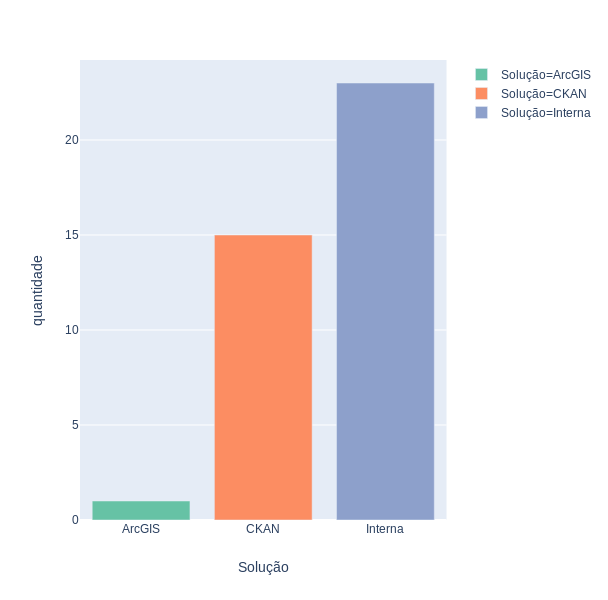

In [33]:
px.bar(
    pd.DataFrame(tipo_solucao).reset_index(),
    x = 'Solução',
    y = 'quantidade',
    color = 'Solução',
    color_discrete_sequence = py.colors.qualitative.Set2
)

### Por poder da república

In [35]:
poder = storage['catalogos'].groupby('Poder').count()['URL'].rename('quantidade')
poder

Poder
Executivo      24
Legislativo    14
Name: quantidade, dtype: int64

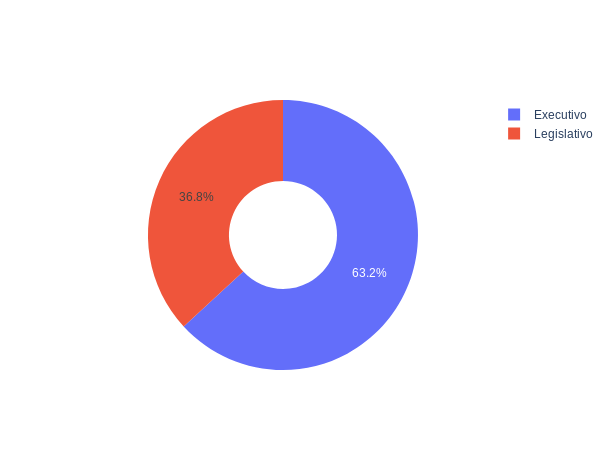

In [39]:
go.Figure(
    data=go.Pie(
        labels=poder.index,
        values=poder.values,
        hole=.4
    )
).show()

### Por esfera

In [42]:
esfera = storage['catalogos'].groupby('Esfera').count()['URL'].rename('quantidade')
esfera

Esfera
Estadual     22
Federal       2
Municipal    15
Name: quantidade, dtype: int64

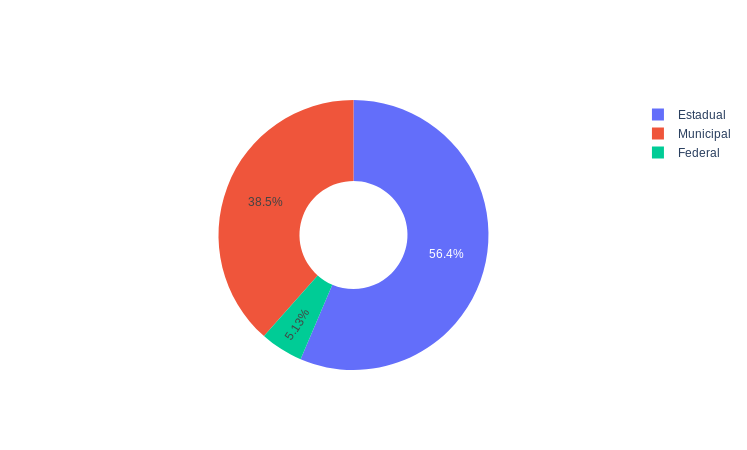

In [43]:
go.Figure(
    data=go.Pie(
        labels=esfera.index,
        values=esfera.values,
        hole=.4
    )
).show()

### Por unidade federativa

In [44]:
uf = storage['catalogos'].groupby('UF').count()['URL'].rename('quantidade')
uf

UF
AL    1
CE    3
DF    2
ES    1
GO    2
MG    5
MT    1
PB    2
PE    4
PR    1
RJ    2
RN    2
RS    5
SP    6
Name: quantidade, dtype: int64

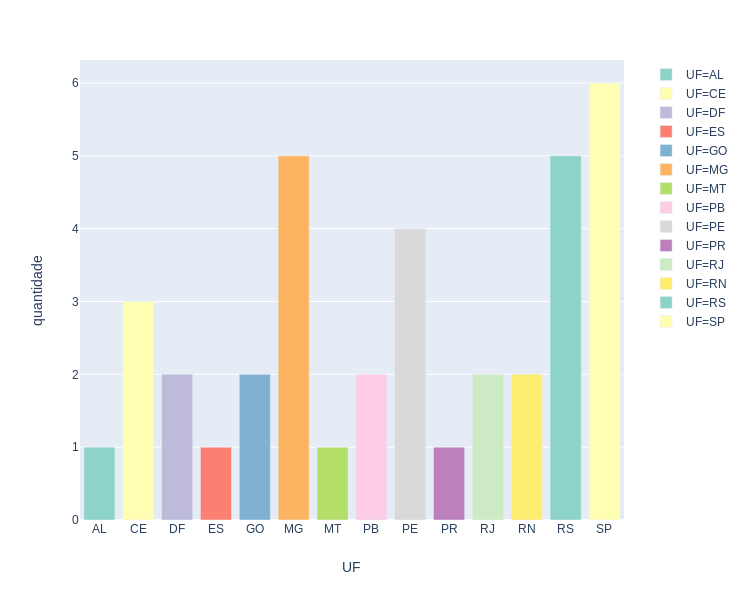

In [47]:
px.bar(
    pd.DataFrame(uf).reset_index(),
    x = 'UF',
    y = 'quantidade',
    color = 'UF',
    color_discrete_sequence = py.colors.qualitative.Set3
)